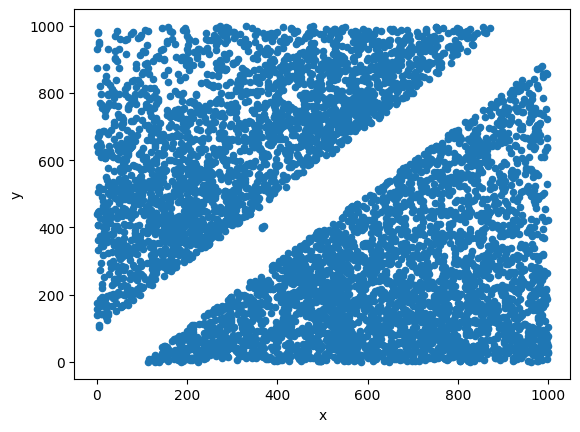

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

# Data kansio projektin rootissa ja .gitignoressa
data = pd.read_csv('../Data/drone_cust_locations.csv', sep=';')
clusters = 3
model = KMeans(init='random', n_clusters=clusters, random_state=1)
dropped_data = data.drop(columns=['clientid'])
model.fit(dropped_data)

cluster_locations = model.cluster_centers_

data.plot.scatter(x="x", y="y");
# Miten tän tulkitsee? Keskellä on tie/joki/metsä/pelto ??

In [185]:
# " + 1" muuttaa klustereiden numeroinnin
data['Cluster'] = model.labels_ + 1
data.head(10)

,clientid,x,y,Cluster
0,1,622.771572,164.857623,2
1,2,416.357298,630.193634,1
2,3,292.735020,567.333231,3
3,4,737.211288,166.225676,2
4,5,540.475375,682.912298,1
5,6,535.469492,318.439661,2
6,7,640.380050,870.833221,1
7,8,235.772075,359.048203,3
8,9,481.896884,661.491838,1
9,10,730.032789,312.177817,2


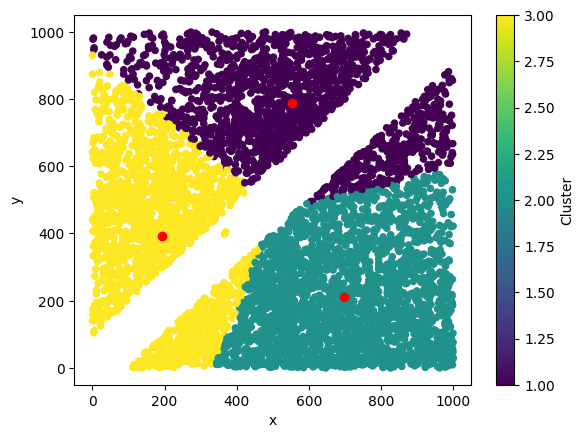

In [186]:
data.plot.scatter(x="x", y="y", c='Cluster', cmap="viridis")
for index, cluster in enumerate(cluster_locations):
    plt.scatter(cluster[0], cluster[1], color='red', label=f'Cluster {index}')

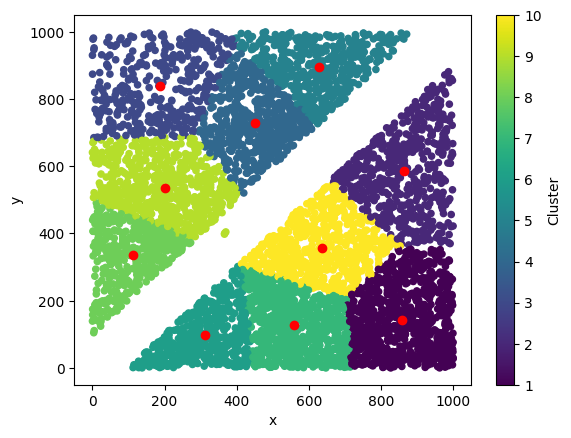

In [190]:
# 3 -> 10 ei pahemmin hidastanut. clusters = 100 huomas pienen eron
# Tää solu poistoon/kommentteihin, kuha eri clusterien määrät tutkittu
clusters = 10
model = KMeans(init='random', n_clusters=clusters, random_state=1)
dropped_data = data.drop(columns=['clientid'])
model.fit(dropped_data)
data['Cluster'] = model.labels_ + 1
cluster_locations = model.cluster_centers_
data.plot.scatter(x="x", y="y", c='Cluster', cmap="viridis")
for index, cluster in enumerate(cluster_locations):
    plt.scatter(cluster[0], cluster[1], color='red')

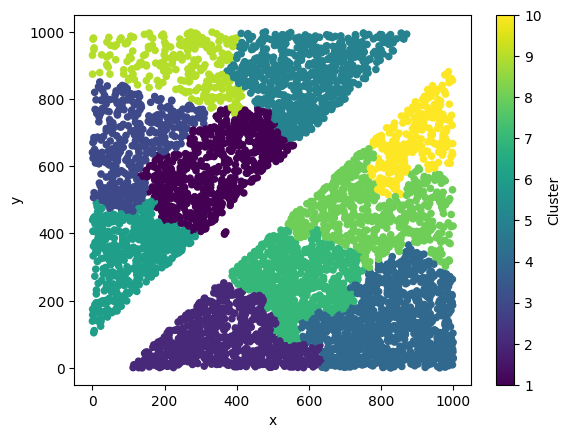

In [194]:
# Discuss the differences in this context.
# KMeans:in klusterit ovat symmetrisempiä kokoavan hierarkisen klusteroinnin klustereihin verrattuna
clusters = 10
model = AgglomerativeClustering(n_clusters=clusters)
model.fit(dropped_data)
data['Cluster'] = model.labels_ + 1
data.plot.scatter(x="x", y="y", c='Cluster', cmap="viridis");

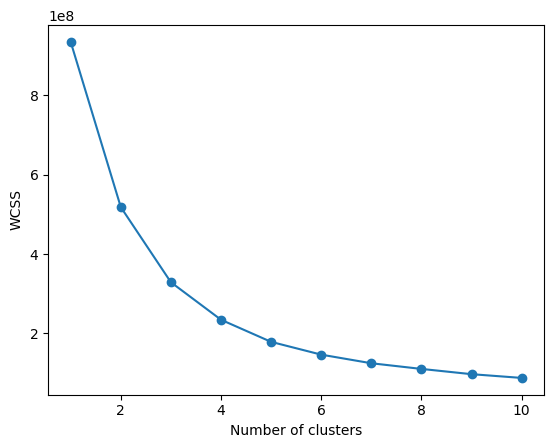

In [189]:
# "Kyynärpää" ~5 klusterin kohdalla
wcss = []
for i in range(1,11):
    model = KMeans(init='random', n_clusters=i, random_state=42).fit(dropped_data)
    wcss.append(model.inertia_)

plt.plot(list(range(1,11)), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

Recommended locations for cluster centers:
 [[490.5513519  826.17771215   4.7984252 ]
 [437.55214927 148.27394138   3.90792453]
 [804.64606147 151.58914934   4.51724138]
 [807.17294171 531.15418639   8.57262905]
 [162.30229393 498.91279387   3.63157895]]


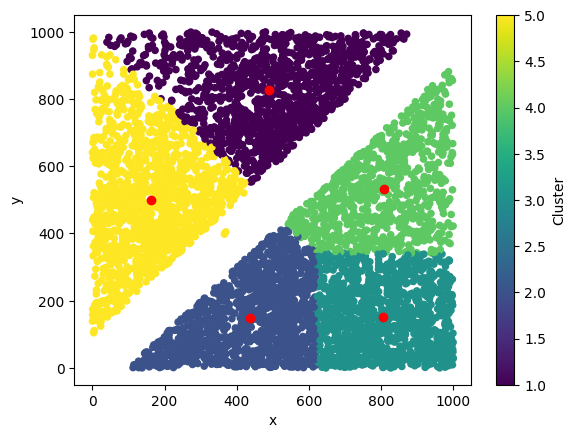

In [195]:
clusters = 5
model = KMeans(init='random', n_clusters=clusters, random_state=1)
dropped_data = data.drop(columns=['clientid'])
model.fit(dropped_data)
data['Cluster'] = model.labels_ + 1
cluster_locations = model.cluster_centers_
data.plot.scatter(x="x", y="y", c='Cluster', cmap="viridis")
for index, cluster in enumerate(cluster_locations):
    plt.scatter(cluster[0], cluster[1], color='red')
print(f'Recommended locations for cluster centers:\n {cluster_locations}')
